### Midterm Practice
*   Part I: Lectures 1 - 8 
*   Part II: Lectures 9 - 10 (see Notebook: Midterm Review -- Lectures 9-10)

_Includes some homework questions, pop quizzes, and quizzes_

#### _Part I:_
*   _Image Formation_
*   _Image Filtering_
*   _Edge Detection_
*   _Corner Detection_
*   _Blob Detection_
*   _SIFT Detection_
*   _Image Transformation & Stitching_

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Directory Paths for Images
data = 'C:/Users/user/OneDrive/Desktop/AUS/4. Senior Year/Spring 2024/COE 49413/Computer-Vision-Repository/midterm prep/data/images'

hw1 = 'C:/Users/user/OneDrive/Desktop/AUS/4. Senior Year/Spring 2024/COE 49413/Homework/COE49413_HW1'
quiz1 = 'C:/Users/user/Downloads/quiz01/quiz01'

Exercise 1: In the August of 1999, Japan decided to re-design its flag. The circle color was changed from #B0313F color to #BC002D color. Apply the neccessary changes and show the flag before and after it was redesigned.

(-0.5, 382.5, 199.5, -0.5)

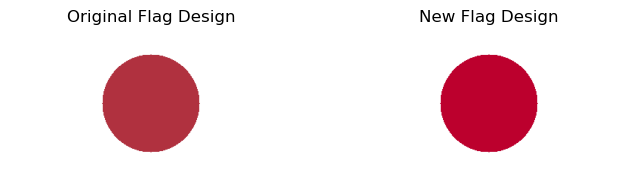

In [19]:
originalFlag = cv2.imread(os.path.join(hw1, 'Q1', 'japan_flag.png'))        # image read in BGR format
newFlag = originalFlag.copy()

originalFlagColor = np.array([63, 49, 176])                                 # B0313F Color
newFlagColor = np.array([45, 0, 188])                                       # BC002D Color

# we want to identify the pixels corresponding to the circle in the original flag so that we can change them
identifiedPixels = cv2.inRange(originalFlag, lowerb = originalFlagColor, upperb = originalFlagColor)            
                                                                            # upper &  lower bound are the same as we only want to detect one color
newFlag[identifiedPixels > 0] = newFlagColor                                # identified pixels within the range will have a value of 255
                                                                            # replace those pixels with the new color

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(originalFlag, cv2.COLOR_BGR2RGB))
plt.title('Original Flag Design')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(newFlag, cv2.COLOR_BGR2RGB))
plt.title('New Flag Design')
plt.axis('off')

Exercise 2: After hearing that Aokigahara Forest in Japan is a weird place, your curiosity pushes you into googling how it looks like. However, the image that you find (forest.jpg) seems too fascinating to be true. Find the issue in this image and fix it.

(-0.5, 999.5, 666.5, -0.5)

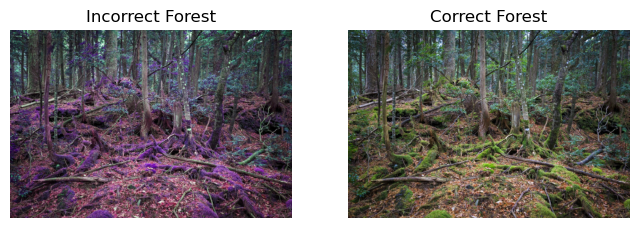

In [24]:
incorrectForest = cv2.imread(os.path.join(hw1, 'Q1', 'forest.jpg'))             # it looks like the color channels may be switched
                                                                                # what should be brown/green is purple/pink
blue, green, red = cv2.split(incorrectForest)

# swap the blue and green channels
correctForest = cv2.merge([green, blue, red])

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(incorrectForest, cv2.COLOR_BGR2RGB))
plt.title('Incorrect Forest')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(correctForest, cv2.COLOR_BGR2RGB))
plt.title('Correct Forest')
plt.axis('off')

Exercise 3: The Shawshank Redemption is my favorite movie. However, my TV is too old now and I cannot see things clearly. Can you fix my TV? I left a frame of the movie for you to have a look (shawshank.png)

(-0.5, 749.5, 421.5, -0.5)

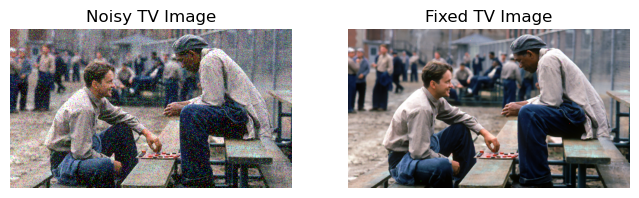

In [45]:
TVWithNoise = cv2.imread(os.path.join(hw1, 'Q2', 'shawshank.png'))          # image contains salt-and-pepper noise
                                                                            # hence, we need to apply a Median Filter
fixedTV = cv2.medianBlur(TVWithNoise, ksize = 3)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(TVWithNoise, cv2.COLOR_BGR2RGB))
plt.title('Noisy TV Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(fixedTV, cv2.COLOR_BGR2RGB))
plt.title('Fixed TV Image')
plt.axis('off')

Exercise 4: MNIST is a hand-written digits dataset. Sharpen the image obtained above by applying an appropriate kernel and show your results.

(-0.5, 1489.5, 1479.5, -0.5)

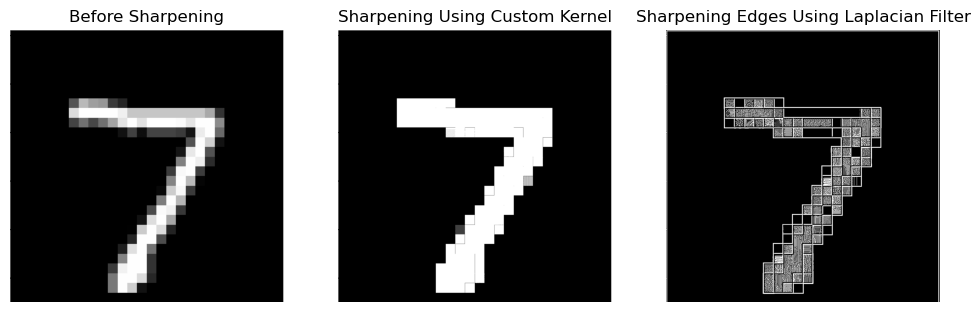

In [62]:
digit = cv2.imread('C:/Users/user/Downloads/sample_mnist_image.png')        # we need to sharpen the image, either using a custom kernel
                                                                            # or we can also try Laplacian Filter to sharpen the edges

# Custom Kernel -- to sharpen the image we need to highlight the pixels that outline the digit and suppress the rest
#                  we can achieve this by giving the center value of the filter a high positive number and the remaining a negative number
sharpenKernel = np.array([
    [-1, -1, -1],
    [-1, 20, -1],
    [-1, -1, -1]
])

sharpenedDigit = cv2.filter2D(digit, ddepth = cv2.CV_32F, kernel = sharpenKernel)
sharpenedDigit = np.clip(sharpenedDigit, a_min = 0, a_max = 1).astype(np.float32)

# Laplacian Filter (experimentation)
digitFiltered = cv2.Laplacian(digit, ddepth = cv2.CV_32F, ksize = 11)
digitFiltered = np.clip(digitFiltered, a_min = 0, a_max = 1).astype(np.float32)

plt.figure(figsize = (12, 12))

plt.subplot(1, 3, 1)
plt.imshow(digit, cmap = 'gray')
plt.title('Before Sharpening')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpenedDigit, cmap = 'gray')
plt.title('Sharpening Using Custom Kernel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(digitFiltered, cmap = 'gray')
plt.title('Sharpening Edges Using Laplacian Filter')
plt.axis('off')

Exercise 5: Examine the use of sobel x and y derivatives for edge detection and compare them to canny edge detector on the image provided (butterfly.jpg)

(-0.5, 492.5, 355.5, -0.5)

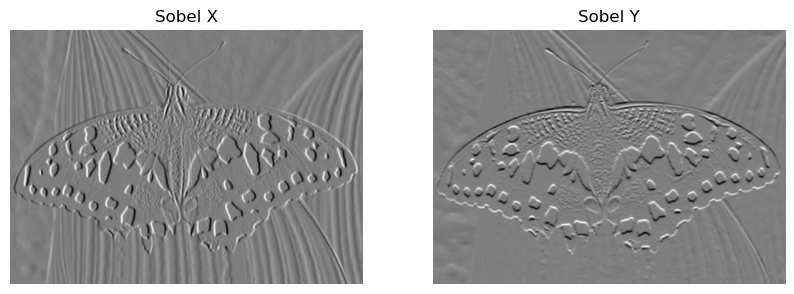

In [82]:
butterfly = cv2.imread(os.path.join(data, 'butterfly.jpg'), cv2.IMREAD_GRAYSCALE)

# Edge Detection Using Sobel
sobelX = cv2.Sobel(butterfly, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 5)
sobelY = cv2.Sobel(butterfly, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = 5)
magnitude = np.sqrt(sobelX ** 2 + sobelY ** 2)

plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(sobelX, cmap = 'gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobelY, cmap = 'gray')
plt.title('Sobel Y')
plt.axis('off')

In [91]:
# Edge Detection Using Canny Edge Detector
edgesCanny = cv2.Canny(butterfly, threshold1 = 80, threshold2 = 120)        # experiment around with the thresholds
                                                                            # interpretation:
                                                                            # magnitudes > 120 are considered strong edges
                                                                            # 80 < magnitudes < 120 are considered weak edges
                                                                            # magnitudes < 80 are considered noise

(-0.5, 492.5, 355.5, -0.5)

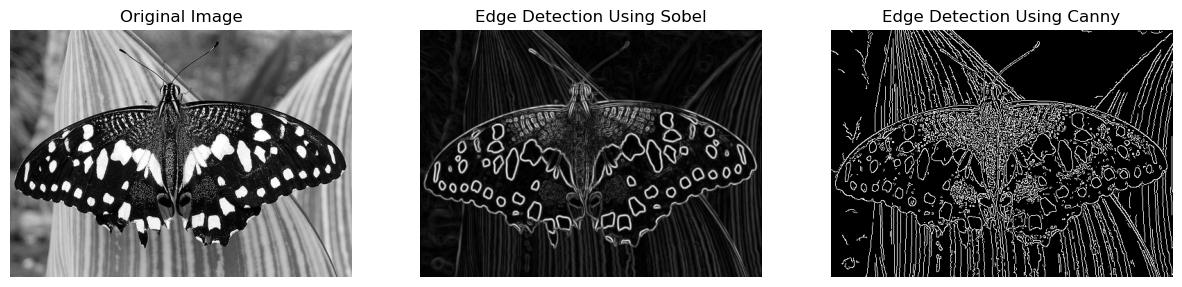

In [92]:
plt.figure(figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.imshow(butterfly, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap = 'gray')
plt.title('Edge Detection Using Sobel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edgesCanny, cmap = 'gray')
plt.title('Edge Detection Using Canny')
plt.axis('off')

(-0.5, 492.5, 355.5, -0.5)

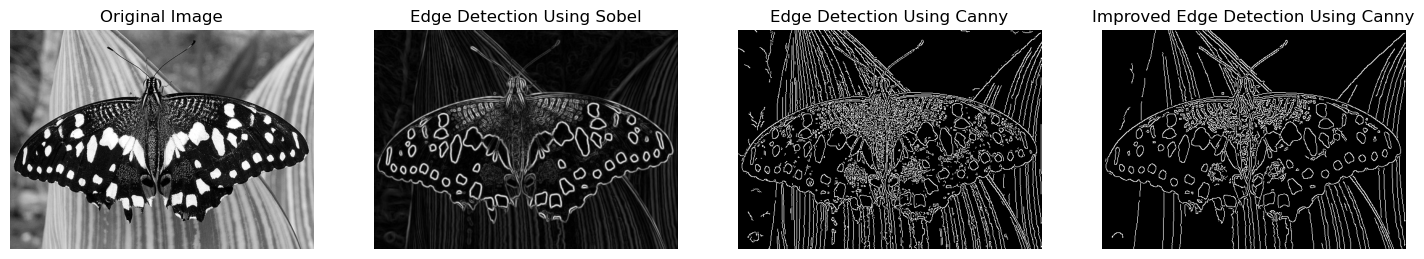

In [98]:
# We can improve the Canny Edge Detection by adding our own blur to the image and playing around with the thresholds. 
# We will set the lower threshold to be the maximum of 0 and 70% of the median value of the original image. 
# On the other hand, we will set the upper threshold to be the minimum of 255 and 1.3 times the median value of the original image.

butterflyBlurred = cv2.GaussianBlur(butterfly, ksize = (3, 3), sigmaX = 3, sigmaY = 3)

median = np.median(butterfly)
lower_threshold = int(max(0, 0.7 * median))
upper_threshold = int(min(255, 1.3 * median))

edgesCanny2 = cv2.Canny(butterflyBlurred, lower_threshold, upper_threshold)

plt.figure(figsize = (18, 18))
plt.subplot(1, 4, 1)
plt.imshow(butterfly, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(magnitude, cmap = 'gray')
plt.title('Edge Detection Using Sobel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(edgesCanny, cmap = 'gray')
plt.title('Edge Detection Using Canny')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edgesCanny2, cmap = 'gray')
plt.title('Improved Edge Detection Using Canny')
plt.axis('off')

Quiz 1: Sergei Mikhailovich Prokudin-Gorskii (1863-1944), a pioneering photographer extensively traveled the Russian Empire from 1909 to 1915, capturing thousands of images. Employing an early color technology, he recorded three exposures of each scene onto glass plates using red, green, and blue filters. Digitized versions

Your task is to take Gorskii glass plate RGB color channels and produce a color image with as few visual artifacts as possible (ignore the artifacts at the image boundaries). To do this, you will need to read the file, extract the three color channel images, place them on top of each other, and align them so that they form a single RGB color image. You will need to implement this in Python.

**Note** that the channel order for all files from top to bottom is BGR, not RGB!

(-0.5, 393.5, 340.5, -0.5)

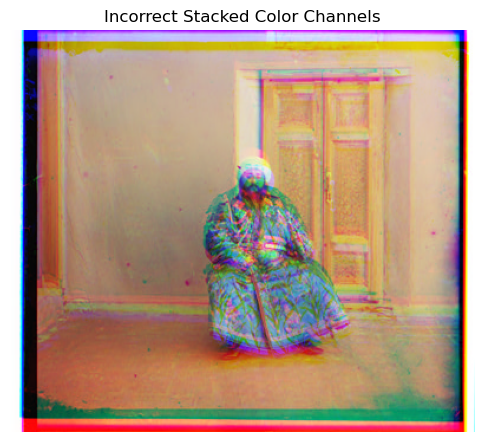

In [20]:
# Step 1: Read the image, extract the Blue, Green and Red channels, stack the channels and display
incorrectImage = cv2.imread(os.path.join(quiz1, '00153v.jpg'), cv2.IMREAD_GRAYSCALE)
imageHeight, imageWeight = incorrectImage.shape[:2]                                            # incorrectImage.shape --> (1024, 394)

split = imageHeight // 3                                                                       # each image should be 341 rows
blueImage = incorrectImage[: split, :]
greenImage = incorrectImage[split : 2 * split, :]
redImage = incorrectImage[2 * split : 3 * split, :]

stackedChannels = np.dstack(tup = (redImage, greenImage, blueImage)).astype(np.uint8)

plt.figure(figsize = (6, 6))
plt.imshow(stackedChannels)
plt.title('Incorrect Stacked Color Channels')
plt.axis('off')

(-0.5, 393.5, 340.5, -0.5)

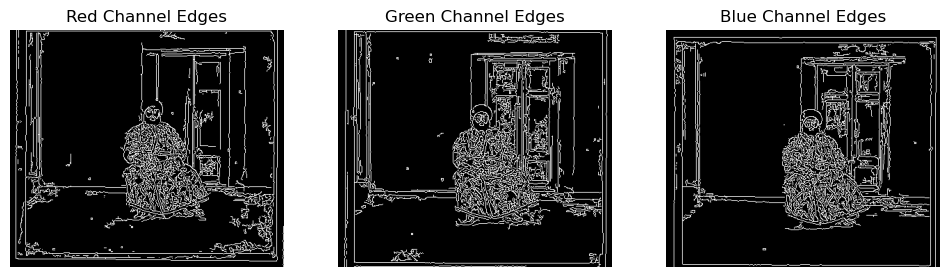

In [17]:
# Step 2: Find the displacement needed to align RGB channels by following the steps below:
#          (1) Use canny edge detector to find the edges in all channels 
cannyRed = cv2.Canny(redImage, threshold1 = 25, threshold2 = 150)
cannyGreen = cv2.Canny(greenImage, threshold1 = 25, threshold2 = 150)
cannyBlue = cv2.Canny(blueImage, threshold1 = 25, threshold2 = 150)

#         (2) Identify horizontal or vertical edges which could help you find the displacement needed 
#             to align the color channels. You can just write your findings here. 
#             No need to show the code for this section
plt.figure(figsize = (12, 12))
plt.subplot(1, 3, 1)
plt.imshow(cannyRed, cmap = 'gray')
plt.title('Red Channel Edges')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cannyGreen, cmap = 'gray')
plt.title('Green Channel Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cannyBlue, cmap = 'gray')
plt.title('Blue Channel Edges')
plt.axis('off')

Text(0.5, 1.0, 'Blue')

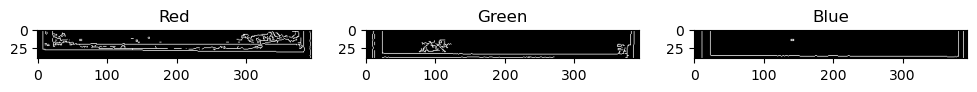

In [18]:
# to shift the color channels, I will look at the bottom part of the images
plt.figure(figsize = (12, 12))
plt.subplot(1, 3, 1)
plt.imshow(cannyRed[300:][:100], cmap = 'gray')
plt.title('Red')

plt.subplot(1, 3, 2)
plt.imshow(cannyGreen[300:][:100], cmap = 'gray')
plt.title('Green')

plt.subplot(1, 3, 3)
plt.imshow(cannyBlue[300:][:100], cmap = 'gray')
plt.title('Blue')

(-0.5, 393.5, 340.5, -0.5)

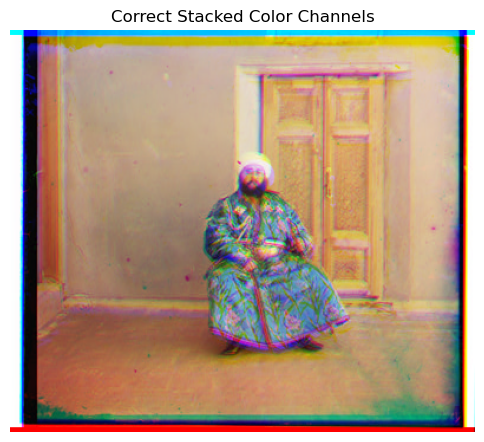

In [24]:
#         (3) Design and apply filters to shift the color channels 
filterRed = np.zeros((10, 1))
filterRed[0][0] = 1

filterGreen = np.zeros((10, 1))
filterGreen[9][0] = 1

filterBlue = np.zeros((10, 1))
filterBlue[9][0] = 1

_red = cv2.filter2D(src = redImage, ddepth = -1, kernel = filterRed, borderType = cv2.BORDER_CONSTANT)
_green = cv2.filter2D(src = greenImage, ddepth = -1, kernel = filterGreen, borderType = cv2.BORDER_CONSTANT)
_blue = cv2.filter2D(src = blueImage, ddepth = -1, kernel = filterBlue, borderType = cv2.BORDER_CONSTANT)

#         (4) [3 pts] stacking the channels and display. 
correctedStackedImage = np.dstack(tup = (_red, _green, _blue)).astype(np.uint8)
plt.figure(figsize = (6, 6))
plt.imshow(correctedStackedImage)
plt.title('Correct Stacked Color Channels')
plt.axis('off')

Exercise 6: Detect corners in the image (building.jpeg) by 
1) Manually implementing the Harris Corner Detection
2) Using OpenCV's cornerHarris function

In [23]:
building = cv2.imread(os.path.join(data, 'building.jpeg'), cv2.IMREAD_GRAYSCALE)
buildingBGR = cv2.cvtColor(building, cv2.COLOR_GRAY2BGR)

# Manually Implementing Harris Corner Detection

# 1. Compute partial derivatives I_x and I_y 
I_x = cv2.Sobel(building, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 3)
I_y = cv2.Sobel(building, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = 3)

# 2a. Calculate the three measures: I_x I_x, I_y I_y, I_x I_y
I_x_squared = I_x ** 2
I_y_squared = I_y ** 2
I_x_y = I_x * I_y

# 2b. Apply Gaussian Filtering to remove noise
I_x_squared = cv2.GaussianBlur(I_x_squared, ksize = (7, 7), sigmaX = 5, sigmaY = 5)
I_y_squared = cv2.GaussianBlur(I_y_squared, ksize = (7, 7), sigmaX = 5, sigmaY = 5)
I_x_y = cv2.GaussianBlur(I_x_y, ksize = (7, 7), sigmaX = 5, sigmaY = 5)

# 3. Estimate the Response R --> det(H) - ktrace(H)^2
k = 0.04

detH = (I_x_squared * I_y_squared) - (I_x_y ** 2)
traceH = I_x_squared + I_y_squared
response = detH - k * (traceH ** 2)

# find corners, which are identified as the pixels greater than the threshold * maximum response
# color those corners in red
buildingBGR[response > 0.05 * response.max()] = [0, 0, 255]

# OpenCV's Harris Corner Detection
harris_response = cv2.cornerHarris(building, blockSize = 7, ksize = 5, k = 0.04)
threshold = 0.05 * harris_response.max()
corners = (harris_response > threshold).astype(np.uint8) * 255                      # response pixels > threshold are considered corners
cornerCoordinates = np.column_stack(tup = (np.where(corners > 0)))                  # corners > 0 --> 255, which means they are actually corners
                                                                                    # cornerCoordinates.shape(75023, 2) --> 75023 rows (corners) & 2 columns (x & y coordinates)

(-0.5, 2519.5, 1419.5, -0.5)

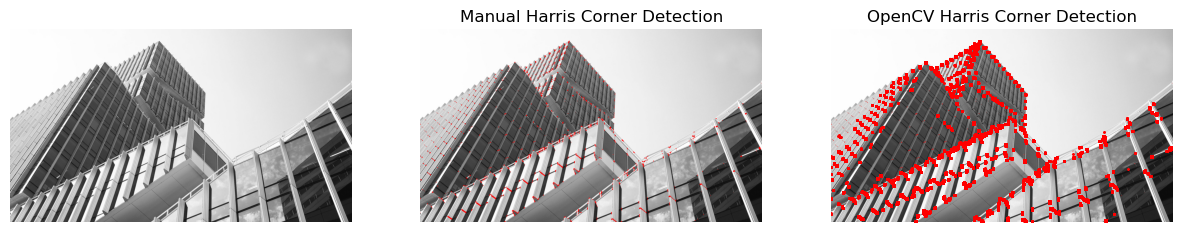

In [30]:
plt.figure(figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(building, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(buildingBGR, cv2.COLOR_BGR2RGB))
plt.title('Manual Harris Corner Detection')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(buildingBGR, cv2.COLOR_BGR2RGB))
plt.scatter(x = cornerCoordinates[:, 1], y = cornerCoordinates[:, 0], color = 'red', marker = '.', s = 5)        # x --> cols, y --> rows
plt.title('OpenCV Harris Corner Detection')
plt.axis('off')

Exercise 7: Perform blob detection on the following image (sunflower.jpg) using three methods:
1) Obtaining the Laplacian of Gaussian (LoG) Kernel Then Convolving That With The Image
2) Blurring The Image With a Gaussian Filter Then Applying Laplacian Operator
3) OpenCV's Blob Detector

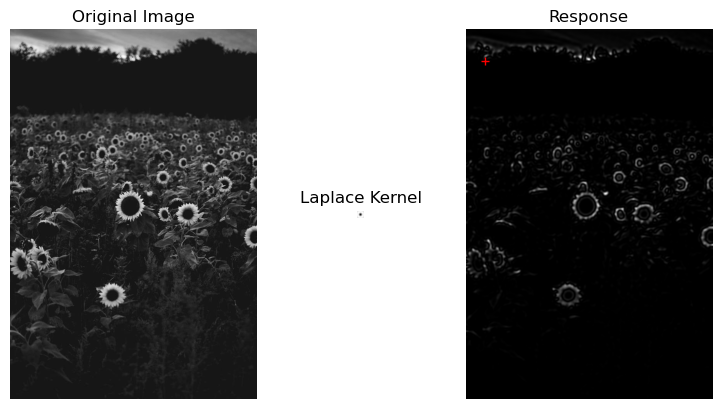

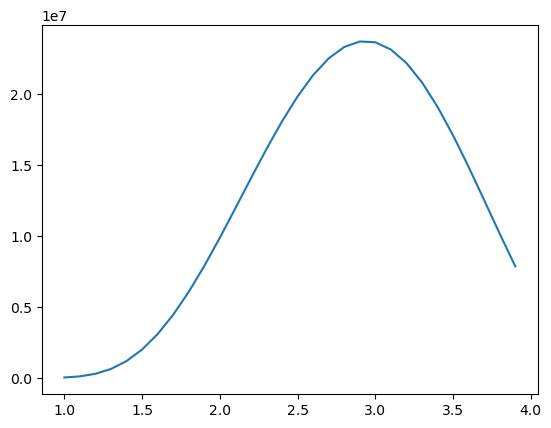

In [30]:
sunflowers = cv2.imread(os.path.join(data, 'sunflower.jpg'), cv2.IMREAD_GRAYSCALE)

# Method 1: Obtaining the LoG Kernel Then Convolving That With the Image
def LoG(ksize, sigma):          # returns sigma normalized values
    assert ksize % 2 == 1       # ksize must be odd
    x, y = np.meshgrid(np.arange(-(ksize // 2), ksize // 2 + 1), np.arange(-(ksize // 2), ksize // 2 + 1))
    return 483 * sigma**2 * -1/(np.pi * sigma**4) * (1 - (x**2 + y**2)/(2*sigma**2)) * np.exp(- (x**2 + y**2)/(2*sigma**2))

responses = []
for i in np.arange(1, 4, 0.1):
    laplacianKernel = LoG(21, i)

    # apply the laplacian
    response = cv2.filter2D(src = sunflowers, ddepth = cv2.CV_32F, kernel = laplacianKernel)

    # square the response
    response = response ** 2

    # record the response at the following pixel (82, 50)
    responses.append((i, response[82, 50]))

# display the original image and the edges obtained with the custom kernel
%matplotlib inline
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [5, 5 * laplacianKernel.shape[0] / sunflowers.shape[0], 5], 
                                          'wspace': .3})
fig.set_figwidth(10)
ax[0].imshow(sunflowers, cmap='gray')
ax[0].set_title('Original Image'), ax[0].axis('off')

ax[1].imshow(laplacianKernel, cmap='gray')
ax[1].set_title('Laplace Kernel'), ax[1].axis('off')

ax[2].imshow(response, cmap='gray')
ax[2].set_title('Response'), ax[2].axis('off') 
plt.plot(50,82,'r+')

plt.figure()
plt.plot(np.array(responses)[:,0],np.array(responses)[:,1])

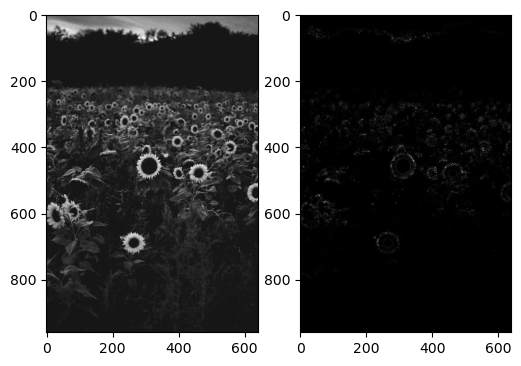

In [45]:
# Method 2: Blurring the Image With a Gaussian Filter Then Applying the Laplacian Operator
originalSunflower = cv2.imread(os.path.join(data, 'sunflower.jpg'), cv2.IMREAD_GRAYSCALE)
sunflowerBlurred = cv2.GaussianBlur(originalSunflower, ksize = (3, 3), sigmaX = 2, sigmaY = 2)     # detecting at large scale -- smooth image a lot
                                                                                                   # detecting at smaller scale -- don't smooth a lot; decrease sigma
lx = cv2.getDerivKernels(dx = 2, dy = 0, ksize = 15, normalize = True)
ly = cv2.getDerivKernels(dx = 0, dy = 2, ksize = 15, normalize = True)
laplacianKernel_ = np.outer(lx[1], lx[0]) + np.outer(ly[1], ly[0])                                # computes the outer product of two vectors

# apply the Laplacian and square the response
response = cv2.filter2D(src = originalSunflower, ddepth = cv2.CV_32F, kernel = laplacianKernel_)
response = response ** 2

# Display the original image and the edges obtained with the custom kernel
plt.figure(figsize = (6, 6))
plt.subplot(1, 2, 1)
plt.imshow(originalSunflower, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(response, cmap = 'gray')

Text(0.5, 1.0, 'Detected Blobs')

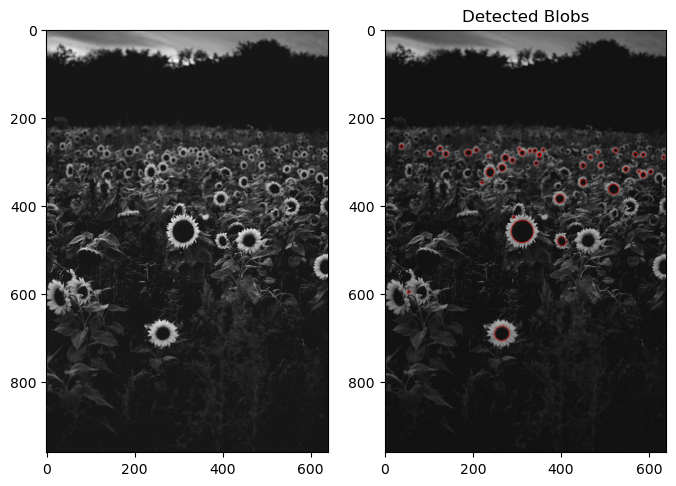

In [52]:
# Method 3: OpenCV's Blob Detector
sunflower = cv2.imread(os.path.join(data, 'sunflower.jpg'), cv2.IMREAD_GRAYSCALE)

# create an object to hol,d the parameters for blob detection
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True                  # enables the filter based on the area of the blob
params.minArea = 20                         # minimum area in pixels for a blob to be considered
params.maxArea = 5000                       # maximum area in pixels for a blob to be considered

blobDetector = cv2.SimpleBlobDetector_create(params)
keypoints = blobDetector.detect(sunflower)              # return a list of keypoints representing the detetected blobs

#visualize the detected blobs on the original image using drawKeypoints
blobs = cv2.drawKeypoints(sunflower, keypoints, outImage = None, color = (255, 0, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.imshow(sunflower, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(blobs, cmap = 'gray')
plt.title('Detected Blobs')